Impact of Federal Monetary Policy on Investments

In [1]:
# Initial imports
import os
import requests
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
import pyfolio as pf

%matplotlib inline

/Users/robertjonathonsmart/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [35]:
# Set current amount of shares data
portfolio_data = {
    "shares": [200]
}

# Set the tickers
tickers = ["NDAQ"]

# Create the shares DataFrame with `tickers` as index
df_shares = pd.DataFrame(portfolio_data, index=tickers)

# Display shares data
df_shares

,shares
NDAQ,200


In [36]:
# Load .env environment variables
load_dotenv()

True

In [37]:
 # Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
fred_api_key = os.getenv("FRED_API_KEY")

In [38]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")
print(f"Fred Key type: {type(fred_api_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>
Fred Key type: <class 'str'>


In [39]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

NameError: name 'tradeapi' is not defined

In [40]:
# Format current date as ISO format
today = pd.Timestamp("2022-08-09", tz="America/New_York").isoformat() 
start_date = pd.Timestamp("2000-08-09", tz="America/New_York").isoformat() 

In [41]:
# Set timeframe to one day ('1Day') for the Alpaca API
timeframe = "1Month"

In [42]:
# Get current price data for S&P500
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
NDAQ = df_portfolio[df_portfolio['symbol']=='NDAQ'].drop('symbol', axis=1)


# Display sample data
df_portfolio

NameError: name 'alpaca' is not defined

Read in  Market Yield on U.S. Treasury Securities at 2-Year Constant Maturity, Quoted on an Investment Basis

In [43]:
# Define the base request URL
request_url = "https://api.stlouisfed.org/fred/series/observations?series_id=DGS2&api_key="

# Concatenate request_url and api_key. Store as new variable
request_url = request_url + fred_api_key + "&file_type=json"

In [44]:
# Execute get request
import json
response_data = requests.get(request_url).json()
yield_value = pd.DataFrame(response_data['observations'])
yield_value

,realtime_start,realtime_end,date,value
0,2022-09-30,2022-09-30,1976-06-01,7.260
1,2022-09-30,2022-09-30,1976-06-02,7.230
2,2022-09-30,2022-09-30,1976-06-03,7.220
3,2022-09-30,2022-09-30,1976-06-04,7.120
4,2022-09-30,2022-09-30,1976-06-07,7.090
...,...,...,...,...
12083,2022-09-30,2022-09-30,2022-09-23,4.20
12084,2022-09-30,2022-09-30,2022-09-26,4.27
12085,2022-09-30,2022-09-30,2022-09-27,4.30
12086,2022-09-30,2022-09-30,2022-09-28,4.07


In [45]:
#Drop columns and set date as index and fix data types
yield_value['value'] = pd.to_numeric(yield_value['value'], errors='coerce')
yield_value = yield_value.drop(['realtime_start','realtime_end'],  axis=1)
yield_value.set_index(['date'])

,value
date,
1976-06-01,7.26
1976-06-02,7.23
1976-06-03,7.22
1976-06-04,7.12
1976-06-07,7.09
...,...
2022-09-23,4.20
2022-09-26,4.27
2022-09-27,4.30


In [48]:
yield_value.create_returns_tear_sheet(yield_value['col'])


AttributeError: 'DataFrame' object has no attribute 'create_returns_tear_sheet'

<AxesSubplot:>

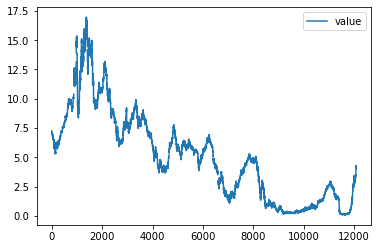

In [47]:
#Plot US2Y
yield_value.plot()
